# Lab 1 : Regression Linéaire

## Generation de courbes d'apprentissages

En Machine Learning, on appelle courbe d’apprentissage (Learning curves) les courbes qui montrent l’évolution de la Fonction Coût au fil des itérations de Gradient Descent. Si votre modèle apprend, alors sa Fonction Coût doit diminuer avec le temps, comme ci-dessous.

L'idée ici est de voir comment la machine a appris les paramètres du modèle avec le Gradient Descent et pour cela, il existe ce qu’on appelle les courbes d’apprentissage.

In [80]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 

## Génération d'un Dataset aléatoire

La fonction **make_regression** prend comme arguments 

1. **le nombre d’échantillons à générer**, 
2. **le nombre de variables** et 
3. **le bruit**. 

Pour maitriser l’aléatoire, on écrit la ligne **np.random.seed(4)**. 

In [81]:
np.random.seed(4) 
n = 1 
m = 100 

Ensuite,  nous retournons deux vecteurs $x$ et $y$.

In [82]:
x, y = make_regression(n_samples=m, n_features=n, noise=10) 

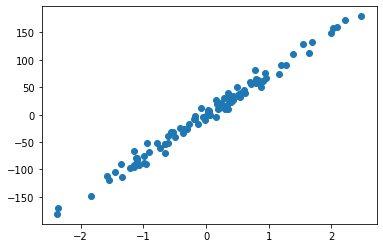

In [83]:
plt.scatter(x, y)

Nous devons utiliser la fonction $reshape()$ car la fonction make_regression ne définit pas correctement toutes les dimensions de y. X = (100,1) et y=(100,). A la suite du reshape, y = (100,1)...ok

In [84]:
y = y.reshape(y.shape[0], 1) 

Nous devons construire notre matrice X avec la colonne de biais c'est à dire une colonne ne contenant que des 1.
$$
X = 
 \begin{pmatrix}
  x_{1} & 1\\
  x_{2} & 1\\
  \vdots \\
  x_{m} & 1 
 \end{pmatrix}
$$
avec $m$, le nombre de ligne.

Nous utilisons la fonction $hstack()\ de\ Numpy$ qui permet de coller deux vecteurs ensembles. Ici le vecteur X et la matrice colonne 1. La fonction $np.ones()$ crée un vecteur de même dimension que X (lignes et colonnes). Et pour finir, on redimensione le vecteur X, nous avons bien une matrice X de dimension 2.

In [85]:
X = np.hstack((np.ones(x.shape), x)) 
X.shape

(100, 2)

Nous allons initialiser un vecteur 
$$\theta = 
 \begin{pmatrix}
  a \\
  b \\   
 \end{pmatrix}
$$ 
qui caractérise notre modèle. On ne connaît pas ce vecteur. Et c'est à la machine de déterminer l'erreur la plus petite c'est à dire qui minimalise la fonction coût.Et au départ, nous initialisons $\theta$ avec des paramètres aléatoires.

In [86]:
np.random.seed(0) 
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

## Modèle

Nous créons notre modèle $F = X . \theta$. Donc nous créons une fonction modèle() qui retourne le produit matriciel de X par $\theta$ car pour rappel  $\theta$ est de dimension (2,1) et X est de dimension (100, 2) donc (100,2) $\times$ (2,1).

In [87]:
def model (X, theta):
    return X.dot(theta)

Affichons pour vérifier ce que cela nous donne.

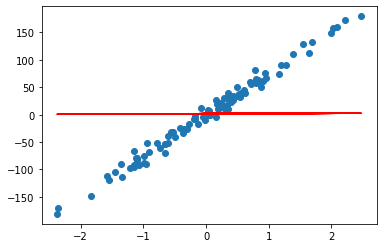

In [88]:
theta
plt.scatter(x,y)
plt.plot (X, model(X,theta), c='r')

Nous voyons clairement qu'avec un $\theta$ aléatoire, nous avons un très mauvais modèle.

## Fonction coût

Nous allons maintenant calculer la fonction coût qui est l'erreur quadratique moyenne.
$$
J(\theta) = \frac{1}{2m}\sum (X . \theta -y)^2
$$

Nous créons une fonction coût qui a comme paramètre $x, y$ et $\theta$. Nous utilisons aussi une variable $m$ qui est le nombre d'exemples dans le Dataset, par exemple la longueur du vecteur $y$ (nous aurions aussi pu prendre la longueur de $x$ ). Pour rappel, nous sommons la différence entre le modèle et $y$.

In [89]:
def fonction_cout(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((model(X,theta)-y)**2) 

## Gradient et Descente de gradient

Nous allons calculer la descente de gradient
$$
\frac{\partial J(\theta)}{\theta} = \frac{1}{m}X^T . (X . \theta - Y)
$$

Nous définissons une fonction gradient qui a comme paramètre $x,y$ et $\theta$. ous utilisons aussi une variable $m$ qui est le nombre d'exemples dans le Dataset, par exemple la longueur du vecteur $y$. Comme X est un vecteur, X.T (fonction T) permet de transposer X et X.T.dot(...) permet de faire le produit matricielle entre X et la différence du modèle avec Y.

In [90]:
def gradient(X,y,theta):
    m = len(y)
    return (1 / m) * X.T.dot(model(X, theta) - y)    


Maintenant, il nous reste à créer notre fonction de descente de gradient qui prend en paramètre x, y et theta mais aussi le paramètre $\alpha$ qui est le Learning Rate. Comme l'algorithme de descente de gradient est itératif, nous passons aussi un parmètre d'itération. Donc, cet algorithme met à jour pendant n itérations la valeur de $\theta$ et une fois cette itération terminé, nous retournons la valeur de $\theta$.

In [91]:
def desc_gradient(X,y,theta,learning_rate, n_iterations):
    
    for i in range(0, n_iterations):
        #mettre à jour theta en disans qu'il est égale à [lui-même - (le learning_rate multiplié par le gradient)]
        theta = theta - (learning_rate * gradient(X,y,theta))
    return theta       


## Phase d'apprentissage

Maintenant nous avons dans notre boîte à outil :
1. la fonction de coût
2. la fonction gradient
3. la fonction descente de gradient
4. x , y et $\theta$ initialisées aléatoirement
5. et le modèle

Donc nous pouvons calculer un $\theta$ final qui minimisera la fonction de coût.

In [92]:
theta_final = desc_gradient(X,y,theta,learning_rate=0.001,n_iterations=1000)

In [93]:
theta

array([[1.76405235],
       [0.40015721]])

Nous allons vérifier si le vecteur paramètre $\theta$, nous donne de bon résultat. Nous allons créer un vecteur prédiction qui est égal au résultat du modèle (X par theta_final). Et nous affichons notre Dataset et le vecteur prédiction.

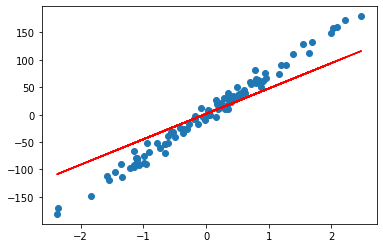

In [94]:
predictions = model (X, theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

On voit que l'apprentissage n'est pas terminé. Donc, nous devons soit augmenter le nombre d'itération c'est à dire faire travailler la machine plus longtemps ou soit augmenter le learning_rate c'est à dire que dans la descente de gradient du moment, nous faisons de trop petis pas et nous allons augmenter la taille. 

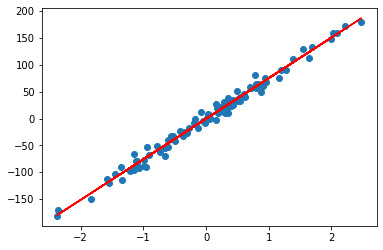

In [95]:
iterations = 1000
learning_rate = 0.01

theta_final = desc_gradient(X,y,theta,learning_rate=learning_rate,n_iterations=iterations)
predictions = model (X, theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

Ce qui est beaucoup mieux.

## Courbe d'apprentissage

Maintenant nous arrivons nos courbes d'apprentissages c'est à dire comment tracer la minimalisation de la fonction de coût.
Nous allons vérifier si la machine a bien appris.

Nous allons changer l'algorithme de Descente de gradient, en ajoutant une tableau cost_history initialiser à zéro et ensuite on enregistre, dans le tableau, le coût du modèle à chaque itération

In [96]:
def desc_gradient(X,y,theta,learning_rate, n_iterations):
    cost_history = np.zeros (n_iterations)
    
    for i in range(0, n_iterations):
        #mettre à jour theta en disans qu'il est égale à [lui-même - (le learning_rate multiplié par le gradient)]
            theta = theta - (learning_rate * gradient(X,y,theta))
            cost_history [i] = fonction_cout(X, y, theta)
    return theta, cost_history   

In [97]:
theta_final, cost_history = desc_gradient(X,y,theta,learning_rate=learning_rate,n_iterations=iterations)

Nous allons tracer notre courbe d'apprentissage

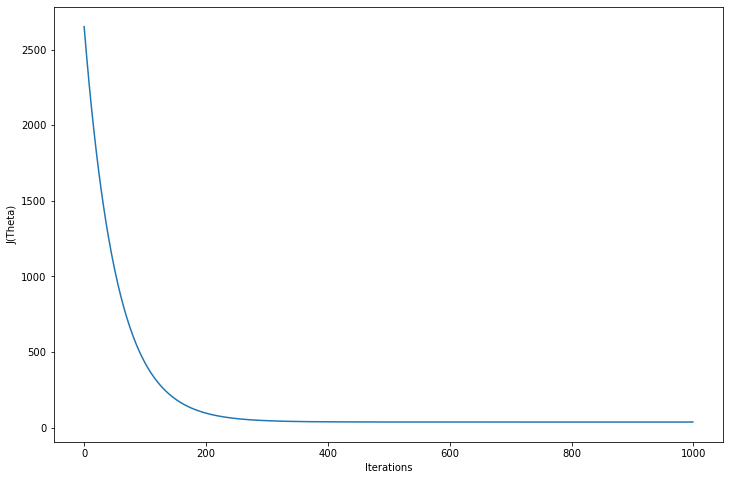

In [98]:
fig,ax = plt.subplots(figsize=(12,8))  
ax.set_ylabel('J(Theta)')  
ax.set_xlabel('Iterations')  
_=ax.plot(range (iterations),cost_history)  

On voit la minimisation de la fonction coût sur les 1000 itérations.

Il est évident que le machine n'apprend plus entre 200 et 300 itérations. Donc, nous pouvons à ce stade changer n_itérations de 1000 à 300 pour optimiser le processus.

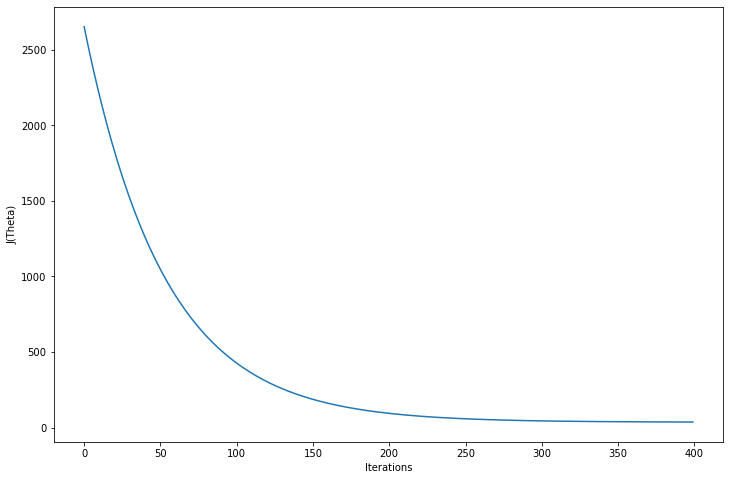

In [99]:
iterations = 400
learning_rate = 0.01

theta_final, cost_history = desc_gradient(X,y,theta,learning_rate=learning_rate,n_iterations=iterations)

fig,ax = plt.subplots(figsize=(12,8))  
ax.set_ylabel('J(Theta)')  
ax.set_xlabel('Iterations')  
_=ax.plot(range (iterations),cost_history)  

## Coefficient de détermination

Nous allons évaluer le coût de coefficient de détermination. Pour évaluer la performance d'un modèlede Régression Linéaire, on peut utiliser le coefficient de détermination $R^2$. Pour rappel,

$$
R^2 = 1 - \frac{\sum(y - f(x))^2}{\sum(y -\bar{y})^2}
$$

Ce qui donne la performance du modèle.Plus $R^2$ est proche de 1 et plus modèle est proche de l'ensemble du Dataset. Nous allons créer une fonction $coef\_\_determination()$ avec deux variables.
Avec u = résidu de la somme des carrés, c'est à dire la somme de (la différence entre les valeurs observées et les valeurs prédites) au carré. Et v =  est la somme total des carrés. Et pour finir, on retourne le rapport de 1-u/v.

In [100]:
def coef_determination (y, pred):
    u=((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return (1 - (u/v))

In [101]:
coef_determination (y, predictions)

0.9867144452060398

On voit que notre coefficient de détermination est de 98,67%. Ce qui est un bon score.